# Data Analysis Notebook
This notebook is used to perform analysis of the data generated from the accompanying python scripts for the Wigner logarithmic negativity and average energy of the states at different generating parameters.
It begins with creating 3D plots of the WLN over the 'parameter space' of each state and then creates bins out of the energies and chooses the maximal WLN values from within those bins.
It then creates plots from this data and then performs some additional analysis on the accuracy of the approximations of the states as the size of the Hilbert space increases.
It finished with some plots of the parameter space and special points.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import matplotlib as mpl
import scipy.constants as cons
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from qutip import *
from funcs import *
from scipy.optimize import curve_fit

def straightline(x, A, B):
    return A * x + B

In [2]:
%matplotlib inline

mpl.rcParams.update({'font.size': 18})
mpl.rcParams.update({'font.family': 'sans-serif'})
mpl.rcParams['axes.labelpad'] = 16

In [3]:
# Reading in data from file
# Numerical Cubic phase state data
cubicdf = pd.concat([pd.read_csv('data/cubic_good3.csv'),
                     pd.read_csv('data/cubic_good2.csv')], ignore_index=True)
cubicdf = cubicdf[cubicdf.nmean < 6.0].sort_values('nmean')

# analytic Cubic phase state data
anacubicdf = pd.concat([pd.read_csv('data/cubicanalytic_good3.csv'),
                        pd.read_csv('data/cubicanalytic_firstnewlimits.csv'),
                        pd.read_csv('data/cubicanalytic_2x2.csv')], ignore_index=True)
anacubicdf = anacubicdf[anacubicdf.nmean < 6.0].sort_values('nmean')

# Triple photon state data (inn is used as I previously called it the 'inner cubic' state, not updated as
# would need to ensure correctly replaced throughout and wont appear in final report anyway)
inncubicdf = pd.concat([pd.read_csv('data/inner_cubic_highdensity.csv'),
                        pd.read_csv('data/inner_cubic_nmeanregion.csv'),
                        pd.read_csv('data/inner_cubic.csv')], ignore_index=True)
inncubicdf = inncubicdf[inncubicdf.nmean < 6.0].sort_values('nmean')

## Numerical Cubic Parameter Plots

In [4]:
X = cubicdf.gamma
Y = cubicdf.r
Z = cubicdf.nmean

# Create triangluation objects to create triangulated surfaces and contours
test = tri.Triangulation(X, Y)

# Mask to make the triangles not try to jump too far (large gaps in the surface)
masktest = tri.TriAnalyzer(test).get_flat_tri_mask(
    min_circle_ratio=0.025, rescale=True)

test.set_mask(masktest)

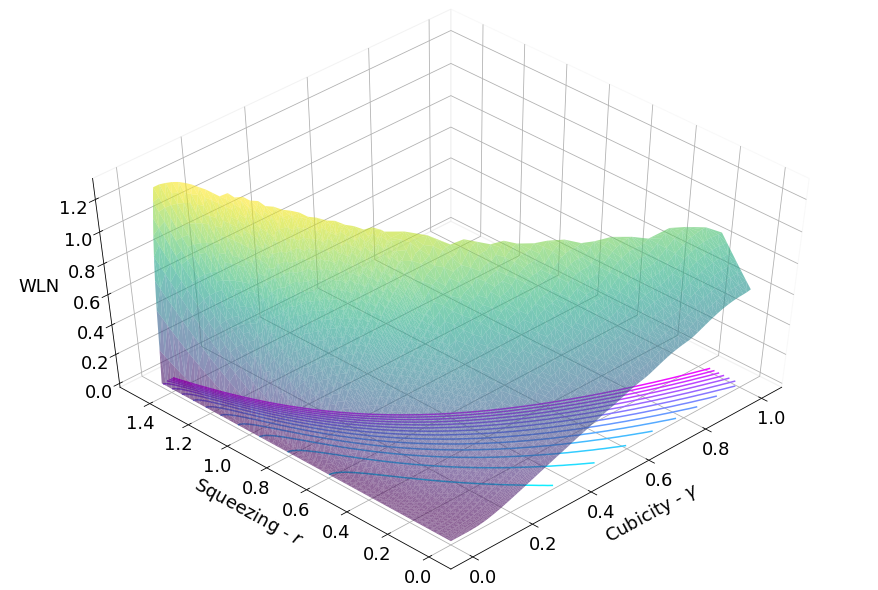

In [5]:
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)

Z2num = cubicdf.WLN

surf1num = ax.plot_trisurf(test, Z2num, alpha=0.6, cmap='viridis')

# Label Axes appropriately
ax.set_xlabel(r'Cubicity - $\gamma$')
ax.set_ylabel(r'Squeezing - $r$')
ax.set_zlabel(r'WLN')

# Remove background grid
# ax.grid(False)

# Remove background fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Make pane around each axes black, adds a border to plot
# ax.xaxis.pane.set_edgecolor('black')
# ax.yaxis.pane.set_edgecolor('black')
# ax.zaxis.pane.set_edgecolor('black')

# Sets the pane borders to be closed squares, by default only 3 sides
ax.xaxis.pane.set_closed(True)
ax.yaxis.pane.set_closed(True)
ax.zaxis.pane.set_closed(True)


#ax.contour(X, Y, Z, 10, zdir='x', offset=x0)
#ax.contour(X, Y, Z, 10, zdir='y', offset=y0)
contsnum = ax.tricontour(test, Z, zdir='z', offset=0, levels=14, cmap='cool')
ax.set_zlim(0, 1.3)
ax.view_init(50, 225)

# fig.colorbar(surf1num, shrink=0.5)
fig.savefig('fig/numcubic-parametersurf.pdf', format='pdf')

plt.show()

## Analytic Cubic parameter Plots

In [6]:
Xana = anacubicdf.gamma
Yana = anacubicdf.r
Zana = anacubicdf.nmean

# Create triangluation objects to create triangulated surfaces and contours
testana = tri.Triangulation(Xana, Yana)

masktestana = tri.TriAnalyzer(testana).get_flat_tri_mask(
    min_circle_ratio=0.04, rescale=True)

testana.set_mask(masktestana)

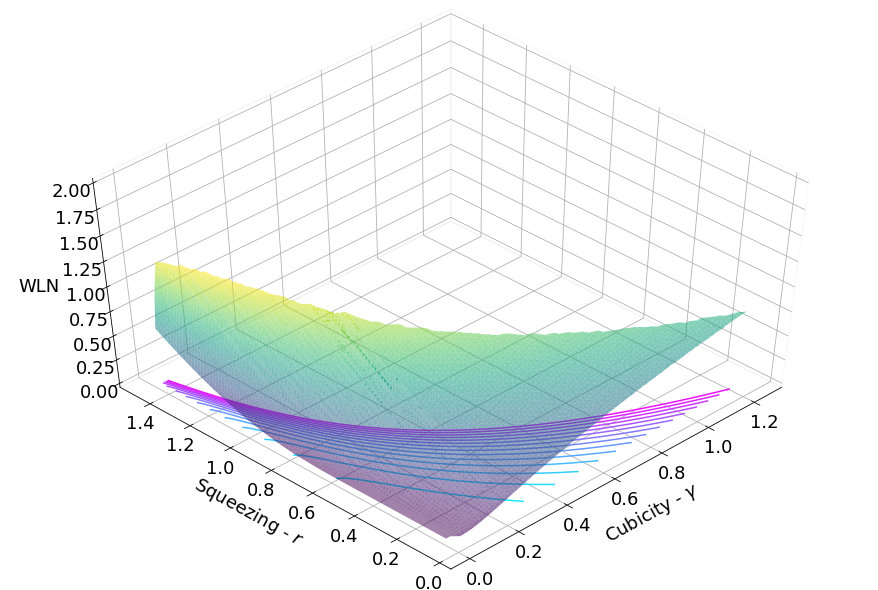

In [7]:
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)

Z2ana = anacubicdf.WLN

surf1ana = ax.plot_trisurf(testana, Z2ana, alpha=0.6, cmap='viridis')

# Label Axes appropriately
ax.set_xlabel(r'Cubicity - $\gamma$')
ax.set_ylabel(r'Squeezing - $r$')
ax.set_zlabel(r'WLN')

# Remove background grid
# ax.grid(False)

# Remove background fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Make pane around each axes black, adds a border to plot
# ax.xaxis.pane.set_edgecolor('black')
# ax.yaxis.pane.set_edgecolor('black')
# ax.zaxis.pane.set_edgecolor('black')

# Sets the pane borders to be closed squares, by default only 3 sides
ax.xaxis.pane.set_closed(True)
ax.yaxis.pane.set_closed(True)
ax.zaxis.pane.set_closed(True)


#ax.contour(X, Y, Z, 10, zdir='x', offset=x0)
#ax.contour(X, Y, Z, 10, zdir='y', offset=y0)
contsana = ax.tricontour(testana, Zana, zdir='z',
                         offset=0, levels=15, cmap='cool')
ax.set_zlim(0, np.ceil(anacubicdf.WLN.max()))
ax.view_init(50, 225)

# fig.colorbar(surf1ana, shrink=0.5)
fig.savefig('fig/anacubic-parametersurf.pdf', format='pdf')

plt.show()

## Triple Photon State Parameter Plots

In [8]:
Xinn = inncubicdf.gamma
Yinn = inncubicdf.r
Zinn = inncubicdf.nmean

# Create triangluation objects to create triangulated surfaces and contours
testinn = tri.Triangulation(Xinn, Yinn)

# Mask to make the triangles not try to jump too far (large gaps in the surface)
masktestinn = tri.TriAnalyzer(testinn).get_flat_tri_mask(
    min_circle_ratio=0.04, rescale=True)

testinn.set_mask(masktestinn)

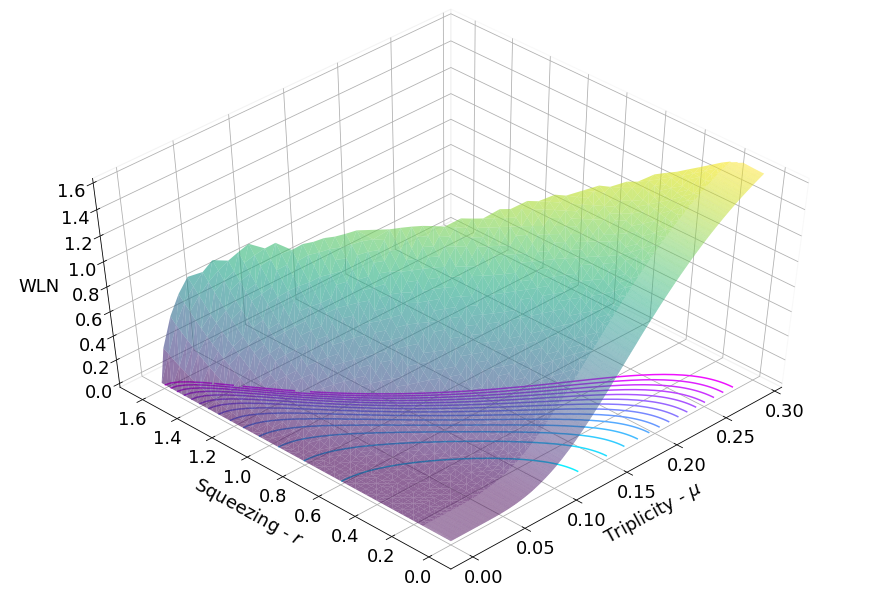

In [9]:
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)

Z2inn = inncubicdf.WLN

surf1inn = ax.plot_trisurf(testinn, Z2inn, alpha=0.6, cmap='viridis')

# Label Axes appropriately
ax.set_xlabel(r'Triplicity - $\mu$')
ax.set_ylabel(r'Squeezing - $r$')
ax.set_zlabel(r'WLN')

# Remove background grid
# ax.grid(False)

# Remove background fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Make pane around each axes black, adds a border to plot
# ax.xaxis.pane.set_edgecolor('black')
# ax.yaxis.pane.set_edgecolor('black')
# ax.zaxis.pane.set_edgecolor('black')

# Sets the pane borders to be closed squares, by default only 3 sides
ax.xaxis.pane.set_closed(True)
ax.yaxis.pane.set_closed(True)
ax.zaxis.pane.set_closed(True)


#ax.contour(X, Y, Z, 10, zdir='x', offset=x0)
#ax.contour(X, Y, Z, 10, zdir='y', offset=y0)
contsinn = ax.tricontour(testinn, Zinn, zdir='z',
                         offset=0, levels=15, cmap='cool')
ax.set_zlim(0, 1.6)
ax.view_init(50, 225)

# fig.colorbar(surf1inn, shrink=0.5)
fig.savefig('fig/tripphoton-parametersurf.pdf', format='pdf')

plt.show()

## Binning nmean data to find maximal WLN generating parameters

In [10]:
# Creating bins for nmean data
bins1 = np.linspace(cubicdf.nmean.min(), cubicdf.nmean.max(), 61)
bins2 = np.linspace(inncubicdf.nmean.min(), inncubicdf.nmean.max(), 61)
bins3 = np.linspace(anacubicdf.nmean.min(), anacubicdf.nmean.max(), 61)

cubicdf['nmeanbins'] = pd.cut(cubicdf.nmean, bins1, include_lowest=True)
inncubicdf['nmeanbins'] = pd.cut(inncubicdf.nmean, bins2, include_lowest=True)
anacubicdf['nmeanbins'] = pd.cut(anacubicdf.nmean, bins3, include_lowest=True)

In [11]:
# Obtain the maximum Mana in each nmean bin
maxWLNs1 = []
maxWLNs2 = []
maxWLNs3 = []

for bin in np.unique(cubicdf.nmeanbins):
    maxWLNs1.append(cubicdf[cubicdf.nmeanbins == bin].WLN.max())

for bin in np.unique(inncubicdf.nmeanbins):
    maxWLNs2.append(inncubicdf[inncubicdf.nmeanbins == bin].WLN.max())

for bin in np.unique(anacubicdf.nmeanbins):
    maxWLNs3.append(anacubicdf[anacubicdf.nmeanbins == bin].WLN.max())

# Define new dataframes as those with gamma, r coords corresponding to max Mana in nmeanbins
cubicdfmax = cubicdf[cubicdf.WLN.isin(maxWLNs1)]
# cubicdfmax = cubicdfmax[cubicdfmax.nmean > 0.15]
inncubicdfmax = inncubicdf[inncubicdf.WLN.isin(maxWLNs2)]
anacubicdfmax = anacubicdf[anacubicdf.WLN.isin(maxWLNs3)]

In [12]:
# Generate Mana Data for Fock states to compare
fnmeans = []
fWLNs = []
N = 10
for i in range(0, 7):
    fockstate = fock(N, i)
    fnmeans.append(expect(num(N), fockstate))
    fWLNs.append(wln(fockstate, 1e-5)[0])

In [13]:
# datafile = 'triple_photon_max_data.csv'
# with open(datafile, 'a') as f:
#             inncubicdfmax.to_csv(f, index=False)

# datafile = 'cubic_max_data.csv'
# with open(datafile, 'a') as f:
#             cubicdfmax.to_csv(f, index=False)

## Final Plot

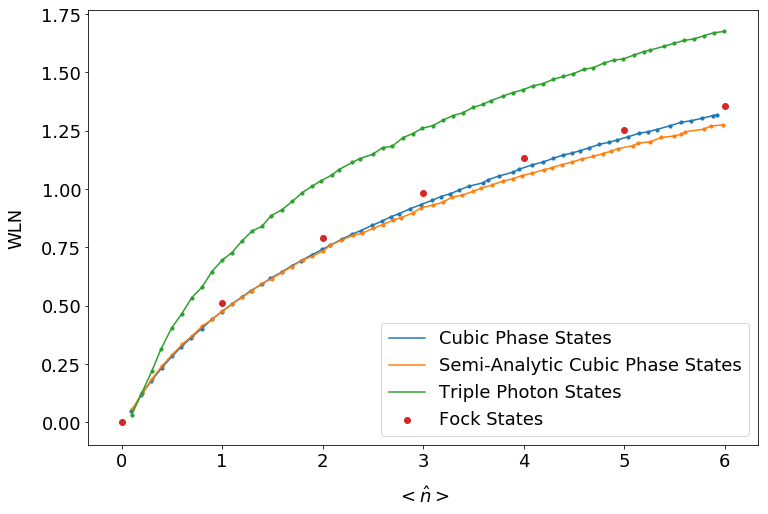

In [14]:
# Plot nmean agains max Mana
fig = plt.figure(figsize=[12, 8])
ax = plt.axes()
ax.plot(cubicdfmax.nmean, cubicdfmax.WLN, label='Cubic Phase States')
ax.scatter(cubicdfmax.nmean, cubicdfmax.WLN, label='_Cubic Phase State', s=10)

ax.plot(anacubicdfmax.nmean, anacubicdfmax.WLN,
        label='Semi-Analytic Cubic Phase States')
ax.scatter(anacubicdfmax.nmean, anacubicdfmax.WLN,
           label='_ana Cubic Phase States', s=10)

ax.plot(inncubicdfmax.nmean, inncubicdfmax.WLN, label='Triple Photon States')
ax.scatter(inncubicdfmax.nmean, inncubicdfmax.WLN,
           label='_Triple Photon State', s=10)

ax.scatter(fnmeans, fWLNs, label='Fock States')
# ax.set_title('''Maximal Value of the Wigner Logarithmic Negativity (WLN) against the mean value of the number
# operator for the triple photon state and cubic phase state''')
ax.set_xlabel(r'$<\hat{n}>$')
ax.set_ylabel('WLN')
ax.legend()


fig.savefig('fig/WLN-fixed_n.pdf', format='pdf')

plt.show()

In [15]:
# Generate Mana Data for Fock states to compare
fnmeans2 = []
fWLNs2 = []
N = 10
for i in range(0, 9):
    fockstate2 = fock(N, i)
    fnmeans2.append(expect(num(N), fockstate2))
    fWLNs2.append(wln(fockstate2, 1e-5)[0])

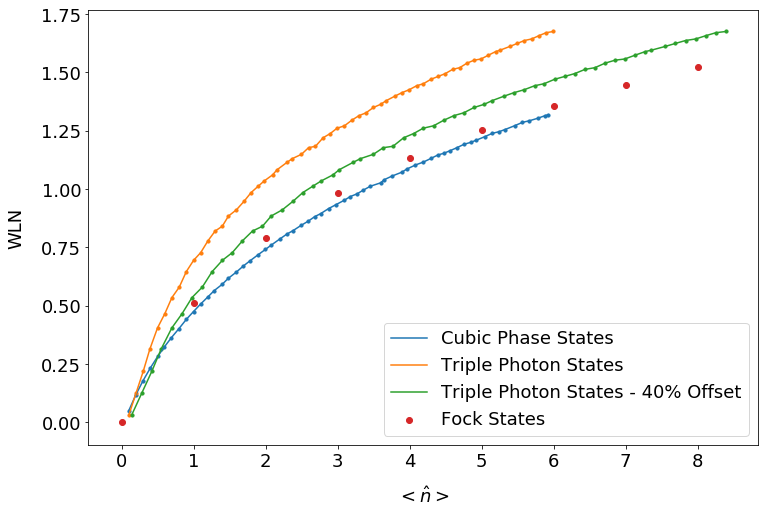

In [16]:
# Plot nmean agains max Mana
fig = plt.figure(figsize=[12, 8])
ax = plt.axes()
ax.plot(cubicdfmax.nmean, cubicdfmax.WLN, label='Cubic Phase States')
ax.scatter(cubicdfmax.nmean, cubicdfmax.WLN, label='_Cubic Phase State', s=10)

ax.plot(inncubicdfmax.nmean, inncubicdfmax.WLN, label='Triple Photon States')
ax.scatter(inncubicdfmax.nmean, inncubicdfmax.WLN,
           label='_Triple Photon State', s=10)

ax.plot(inncubicdfmax.nmean * 1.4, inncubicdfmax.WLN, label='Triple Photon States - 40% Offset')
ax.scatter(inncubicdfmax.nmean * 1.4, inncubicdfmax.WLN,
           label='_Triple Photon State', s=10)

ax.scatter(fnmeans2, fWLNs2, label='Fock States')
# ax.set_title('''Maximal Value of the Wigner Logarithmic Negativity (WLN) against the mean value of the number
# operator for the triple photon state and cubic phase state''')
ax.set_xlabel(r'$<\hat{n}>$')
ax.set_ylabel('WLN')
ax.legend()
plt.xticks([0,1,2,3,4,5,6,7,8])

fig.savefig('fig/WLN-fixed_n_error.pdf', format='pdf')

plt.show()


# Additional Analysis

## High Energy & Low Energy States at Different N

In [17]:
inncubicdfmax.head(10)

,Wnorm,WLN,gamma,r,nmean,Ndim,xbound,xcount,ybound,ycount,time1,time2,nmeanbins
7820,0.999977,0.032156,0.070707,0.018367,0.099788,150,"[-5, 6]",200,"[-6, 4]",200,1.194686,4.953828,"(-0.001, 0.0999]"
7627,0.999988,0.125916,0.095455,0.012245,0.199705,150,"[-8, 9]",200,"[-10, 6]",200,2.300225,4.908572,"(0.0999, 0.2]"
9531,0.999944,0.218947,0.109596,0.070408,0.299015,150,"[-9, 10]",200,"[-10, 6]",200,1.136478,4.939803,"(0.2, 0.3]"
84,0.999844,0.313675,0.122034,0.028814,0.390533,150,"[-9, 10]",200,"[-11, 11]",200,1.231417,4.980933,"(0.3, 0.4]"
26,0.999773,0.404968,0.132203,0.000000,0.497670,150,"[-10, 11]",200,"[-13, 11]",200,2.302791,4.846419,"(0.4, 0.5]"
9539,0.999684,0.465929,0.137879,0.070408,0.599039,150,"[-11, 12]",200,"[-12, 11]",200,1.152585,4.945263,"(0.5, 0.6]"
8941,0.999530,0.534934,0.144949,0.052041,0.697573,150,"[-11, 12]",200,"[-13, 11]",200,1.128712,4.929190,"(0.6, 0.7]"
10242,0.999729,0.579349,0.148485,0.091837,0.798985,150,"[-13, 14]",200,"[-13, 11]",200,3.444965,4.951061,"(0.7, 0.8]"
8844,0.999613,0.646044,0.155556,0.048980,0.897383,150,"[-13, 14]",200,"[-14, 12]",200,2.338664,4.964153,"(0.8, 0.899]"
4767,0.999501,0.694621,0.160169,0.048305,0.999211,150,"[-13, 14]",200,"[-14, 12]",200,1.153627,4.874149,"(0.899, 0.999]"


In [18]:
# gammahightest = 0.286364
# rhightest = 0.039796

gammatest =  0.160169
rtest = 0.0

N1 = 150
N2 = 200
N3 = 300
trip1 = innercubic(gammatest, rtest, N1)
trip2 = innercubic(gammatest, rtest, N2)
trip3 = innercubic(gammatest, rtest, N3)
print(trip1[1], trip2[1], trip3[1])

0.9794128180462567 1.0139862915499467 1.061308619882068


In [19]:
wln1 = wln(trip1[0], 1e-3, 200, 200)
wln2 = wln(trip2[0], 1e-3, 200, 200)
wln3 = wln(trip3[0], 1e-3, 200, 200)

print(wln1, wln2, wln3, sep='\n')

(0.6817333091363642, 0.9976906642876403, 12.314342260360718, 8.454460620880127, [-9.0, 9.0], [-11.0, 9.5])
(0.6999077263577824, 0.9981811670564784, 22.607739686965942, 8.308812618255615, [-10.0, 10.0], [-12.0, 10.5])
(0.7235821131857577, 0.9986614676755018, 57.06228828430176, 18.892472743988037, [-11.5, 11.5], [-14.0, 12.5])


In [20]:
print(trip3[1] / trip1[1] - 1, trip2[1] / trip1[1] - 1)

0.08361724527883752 0.035300205252221994


In [21]:
print(wln3[0] / wln1[0] - 1, wln2[0] / wln1[0] - 1)

0.06138588725026284 0.026659130451528013


# Additional plots
## 2d Parameter space plots with maximal WLN points marked

In [22]:
# Calculate least squares fit to the Max Mana data
[A1, B1], pcov1 = curve_fit(straightline, cubicdfmax.gamma, cubicdfmax.r)
perr1 = np.sqrt(np.diag(pcov1))

[A2, B2], pcov2 = curve_fit(straightline, inncubicdfmax.gamma, inncubicdfmax.r)
perr2 = np.sqrt(np.diag(pcov2))

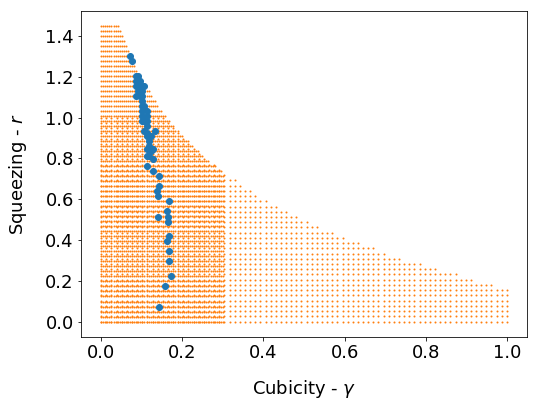

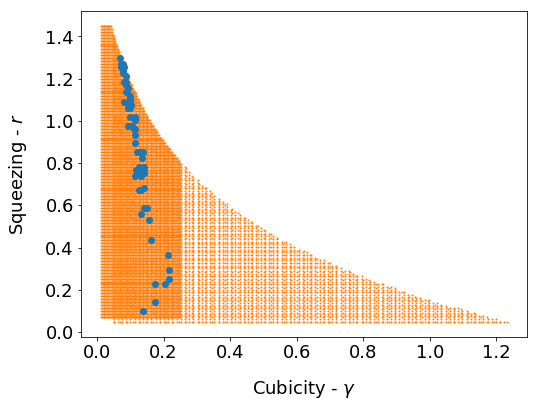

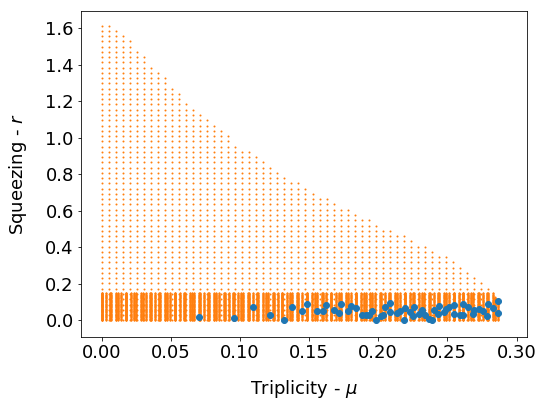

In [23]:
# Plot Points at which we find the maximum Mana for constant nmean for each state

fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
# ax.set_title('Cubic Phase State')
ax.set_xlabel(r'Cubicity - $\gamma$')
ax.set_ylabel(r'Squeezing - $r$')
# Lines
# plt.plot(cubicdfmax.gamma, straightline(cubicdfmax.gamma, A1, B1))
# plt.plot(cubicdfmax.gamma, straightline(cubicdfmax.gamma, A1 + perr1[0], B1 + perr1[1]))
# plt.plot(cubicdfmax.gamma, straightline(cubicdfmax.gamma, A1 - perr1[0], B1 - perr1[1]))
# Scatters
plt.scatter(cubicdfmax.gamma, cubicdfmax.r, zorder=1)
plt.scatter(cubicdf.gamma, cubicdf.r, s=1, zorder=0)
# ax.set_xlim(0.05, 0.2)
# fig.savefig('fig/cubicphase-2dparameterplot-zoomed.pdf', bbox_inches="tight")
fig.savefig('fig/cubicphase-2dparameterplot-full.eps', bbox_inches = "tight")
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
# ax.set_title('Cubic Phase State')
ax.set_xlabel(r'Cubicity - $\gamma$')
ax.set_ylabel(r'Squeezing - $r$')
# Lines
# plt.plot(cubicdfmax.gamma, straightline(cubicdfmax.gamma, A1, B1))
# plt.plot(cubicdfmax.gamma, straightline(cubicdfmax.gamma, A1 + perr1[0], B1 + perr1[1]))
# plt.plot(cubicdfmax.gamma, straightline(cubicdfmax.gamma, A1 - perr1[0], B1 - perr1[1]))
# Scatters
plt.scatter(anacubicdfmax.gamma, anacubicdfmax.r, zorder=1)
plt.scatter(anacubicdf.gamma, anacubicdf.r, s=1, zorder=0)
# ax.set_xlim(0.05,0.2)
# fig.savefig('fig/analytic_cubicphase-2dparameterplot-zoomed.pdf', bbox_inches = "tight")
# fig.savefig('fig/analytic_cubicphase-2dparameterplot-full.pdf',
#             bbox_inches="tight")
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
# ax.set_title('Triple Photon State')
ax.set_xlabel(r'Triplicity - $\mu$')
ax.set_ylabel(r'Squeezing - $r$')
# Lines
# plt.plot(inncubicdfmax.gamma, straightline(inncubicdfmax.gamma, A2, B2))
# plt.plot(inncubicdfmax.gamma, straightline(inncubicdfmax.gamma, A2 + perr2[0], B2 + perr2[1]))
# plt.plot(inncubicdfmax.gamma, straightline(inncubicdfmax.gamma, A2 - perr2[0], B2 - perr2[1]))
# Scatters
plt.scatter(inncubicdfmax.gamma, inncubicdfmax.r, zorder=4)
plt.scatter(inncubicdf.gamma, inncubicdf.r, s=1)
# ax.set_ylim(-0.01, 0.12)
# fig.savefig('fig/triplephoton-2dparameterplot-zoomed.pdf', bbox_inches = "tight")
# fig.savefig('fig/triplephoton-2dparameterplot-full.pdf', bbox_inches="tight")
plt.show()